<a href="https://colab.research.google.com/github/SilvioCesarTeixeira/PJI4/blob/master/PIJ4_ETL_SG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar e Importar Bibliotecas

In [175]:
!pip install openpyxl
!pip install pyexcel
!pip install sweetviz
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
import pandas as pd
#from google.colab import files
import io
import openpyxl
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

Se for carregar arquivo do computador, deve retirar o caracter # da frente da linha de código logo abaixo e escolher os arquivos  

In [ ]:
#uploaded = files.upload()

Definir caminho para os arquivos de dados

In [177]:
url_SG = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/A170043189_40_88_59.xlsx'
url_QA = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/QA_ITP_SMP.xlsx'

Criar Dataframes

In [191]:
df1 = pd.read_excel(url_QA, engine='openpyxl')
df2 = pd.read_excel(url_SG, engine='openpyxl')
df2

,Fonte TABNET – Secretaria Municipal da Saúde da Prefeitura de São Paulo -sp,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,COVID19 e-SUS-VE S�ndrome Gripal (SG),NaN,NaN,NaN
1,N� de Casos por Ano M�s Dia Notifica��o e Subp...,NaN,NaN,NaN
2,Subprefeitura(Res): ITAIM PAULISTA,SAO MIGUEL,NaN,NaN
3,Per�odo:Jan/2020-Mar/2023,NaN,NaN,NaN
4,Ano M�s Dia Notifica��o,ITAIM PAULISTA,SAO MIGUEL,Total
...,...,...,...,...
1100,1. Se for utilizar per�odos menores (como de 3...,por exemplo) o(s) per�odo(s) selecionado(s) n...,NaN,NaN
1101,2. Se selecionar todos os per�odos,o resultado trar� o total de casos,mas o tempo de processamento aumentar� propor...,NaN
1102,3. Os bancos est�o separados por m�s de inici...,NaN,NaN,NaN
1103,4. Informamos que devido a atualiza��o no sist...,NaN,NaN,NaN


Definir a linha zero do dataframe 1 como título das colunas

In [192]:
df1
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))
df1

,date,pm25,pm10,o3,no2,so2,co
1,2023/3/2,44,19,41,8,,
2,2023/3/3,54,24,45,9,,
3,2023/3/4,52,22,29,10,,
4,2023/3/5,49,20,10,10,,
5,2023/2/5,56,,29,6,,
...,...,...,...,...,...,...,...
3052,2014/4/1,,,27,,,
3053,2018/9/19,,,,12,1,6
3054,2019/6/10,,,,,1,5
3055,2018/9/17,,,,,,3


Definindo a primeira coluna como data com padrão Português do Brasil

In [193]:
df1['Data'] = pd.to_datetime(df1['date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
col_Data_correta = df1.iloc[:, -1]
df1 = df1.iloc[:, 1:-1]
df1.insert(loc=0, column='Data', value=col_Data_correta)
df1

,Data,pm25,pm10,o3,no2,so2,co
1,02/03/2023,44,19,41,8,,
2,03/03/2023,54,24,45,9,,
3,04/03/2023,52,22,29,10,,
4,05/03/2023,49,20,10,10,,
5,05/02/2023,56,,29,6,,
...,...,...,...,...,...,...,...
3052,01/04/2014,,,27,,,
3053,19/09/2018,,,,12,1,6
3054,10/06/2019,,,,,1,5
3055,17/09/2018,,,,,,3


In [194]:
df2.columns = df2.iloc[4]
linhas_remover = list(range(0,5)) + list(range(1097,1105))
df2 = df2.reindex(df2.index.drop(linhas_remover))
df2 = df2.rename(columns={'Ano M�s Dia Notifica��o': 'Data'})
df2

4,Data,ITAIM PAULISTA,SAO MIGUEL,Total
5,03/01/2020,4,5,9
6,04/01/2020,9,17,26
7,05/01/2020,4,3,7
8,20/01/2020,-,1,1
9,23/01/2020,1,-,1
...,...,...,...,...
1092,26/02/2023,28,45,73
1093,27/02/2023,132,184,316
1094,28/02/2023,178,158,336
1095,01/03/2023,96,172,268


Juntar os dois dataframes, mas mantendo apenas as datas que coincidem

In [195]:
df_base = pd.merge(df1, df2, how='inner', on='Data')

Definir uma data de corte

In [196]:
data_limite = '01/01/2020'
#df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')
df_base = df_base.loc[df_base['Data'] > data_limite]

Analisar o conteúdo e os tipos de dados do dataframe base

In [197]:
df_base.describe()

,Data,pm25,pm10,o3,no2,so2,co,ITAIM PAULISTA,SAO MIGUEL,Total
count,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
unique,1024,114,70,62,28,1,1,432,432,619
top,02/03/2023,,15,25,7,,,107,128,268
freq,1,76,51,48,105,1024,1024,9,9,7


In [198]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 1023
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            1024 non-null   object
 1    pm25           1024 non-null   object
 2    pm10           1024 non-null   object
 3    o3             1024 non-null   object
 4    no2            1024 non-null   object
 5    so2            1024 non-null   object
 6    co             1024 non-null   object
 7   ITAIM PAULISTA  1024 non-null   object
 8   SAO MIGUEL      1024 non-null   object
 9   Total           1024 non-null   object
dtypes: object(10)
memory usage: 88.0+ KB


Renomear colunas com titulo extenso e converter strings em tipos numericos

In [224]:
df_base = df_base.rename(columns={'ITAIM PAULISTA': 'IT_SG', 'SAO MIGUEL': 'SM_SG', 'Total':'Total_SG'})
df_base[' pm25'] = pd.to_numeric(df_base[' pm25'], errors='coerce')
df_base[' pm10'] = pd.to_numeric(df_base[' pm10'], errors='coerce')
df_base[' o3'] = pd.to_numeric(df_base[' o3'], errors='coerce')
df_base[' no2'] = pd.to_numeric(df_base[' no2'], errors='coerce')
df_base['IT_SG'] = pd.to_numeric(df_base['IT_SG'], errors='coerce')
df_base['SM_SG'] = pd.to_numeric(df_base['SM_SG'], errors='coerce')

In [225]:
df_base.describe()

,pm25,pm10,o3,no2,IT_SG,SM_SG,Total_SG
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,51.345992,24.273547,26.905528,8.534359,191.833497,207.577865,398.241211
std,23.538669,13.490677,9.865920,4.683387,158.728426,164.354881,319.199217
min,9.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,15.000000,20.000000,5.000000,74.000000,84.000000,155.750000
50%,49.000000,21.000000,26.000000,8.000000,144.000000,160.000000,299.000000
75%,64.000000,32.000000,32.000000,11.000000,282.000000,296.250000,583.000000
max,138.000000,88.000000,73.000000,30.000000,861.000000,1272.000000,1844.000000


In [226]:
df_base.tail()

,Data,pm25,pm10,o3,no2,so2,co,IT_SG,SM_SG,Total_SG
1019,16/04/2020,51.345992,30.000000,32.0,9.000000,,,100.0,111.0,211
1020,22/03/2020,51.345992,9.000000,21.0,8.534359,,,6.0,2.0,8
1021,03/02/2022,51.345992,24.273547,12.0,6.000000,,,331.0,389.0,720
1022,04/02/2022,51.345992,24.273547,26.0,11.000000,,,263.0,333.0,596
1023,05/02/2022,51.345992,24.273547,19.0,8.000000,,,79.0,86.0,165


Utilizar o sweetviz para gerar um relatório com as estatísticas dos dados

In [217]:
relatorio = sv.analyze(df_base, pairwise_analysis='off')
relatorio.show_html('Relatorio.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Preencher os valores NaN (não numéricos) com a média de cada variável

In [218]:
df_base[' pm25'].fillna(value=df_base[' pm25'].mean(), inplace=True)
df_base[' pm10'].fillna(value=df_base[' pm10'].mean(), inplace=True)
df_base[' o3'].fillna(value=df_base[' o3'].mean(), inplace=True)
df_base[' no2'].fillna(value=df_base[' no2'].mean(), inplace=True)
df_base['IT_SG'].fillna(value=df_base['IT_SG'].mean(), inplace=True)
df_base['SM_SG'].fillna(value=df_base['SM_SG'].mean(), inplace=True)
df_base['Total_SG'].fillna(value=df_base['Total_SG'].mean(), inplace=True)

Gerar uma matriz de correlação entre as variáveis do dataframe base

In [219]:
corr_matriz1 = df_base.corr()

Plotar o Mapa de Calor com as correlações calculadas

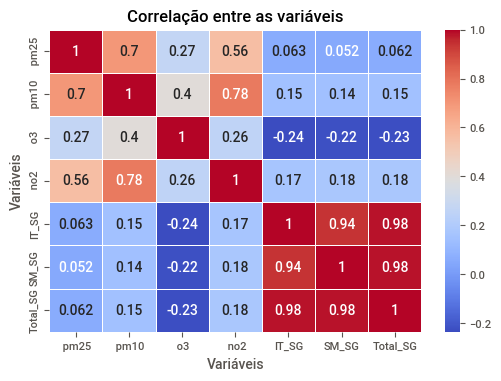

In [220]:
sns.heatmap(corr_matriz1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação entre as variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

Crias uma série temporal de dados do dataframe

In [229]:
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')

In [230]:
df_base.dtypes

Data        datetime64[ns]
 pm25              float64
 pm10              float64
 o3                float64
 no2               float64
 so2                object
 co                 object
IT_SG              float64
SM_SG              float64
Total_SG             int64
dtype: object

In [243]:
df_base_mmAAAA = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month])['Total_SG'].sum()

In [244]:
df_base_mmAAAA

Data  Data
2020  1          45
      2           3
      3         201
      4        3845
      5        9317
      6       18513
      7       20455
      8       15364
      9       11079
      10      11043
      11      11927
      12      14653
2021  1       17772
      2       15698
      3       33019
      4       19760
      5       22069
      6       20682
      7       14704
      8       15547
      9       11290
      10       7645
      11       3267
      12       9927
2022  1       12886
      2       10218
      3        6605
      4        4379
      5        5832
      6        7923
      7       11915
      8        6627
      9        4252
      10       2995
      11      11524
      12       7190
2023  1        3361
      2        3973
      3         294
Name: Total_SG, dtype: int64

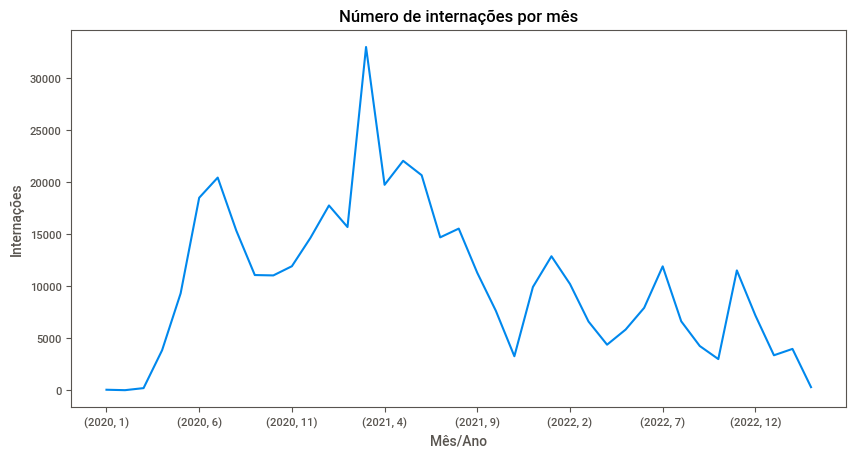

In [241]:
df_base_mmAAAA.plot(kind='line', figsize=(10, 5))
plt.title('Número de internações por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Internações')
plt.show()